In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# show plot intermediately under the calling cell
%matplotlib inline

In [2]:
# read CSV files
df = pd.read_csv('Melbourne_housing_FULL.csv')

#set pandas settings
pd.set_option('display.max_columns', None)

# disable some warning
import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

In [3]:
df.shape

(34857, 21)

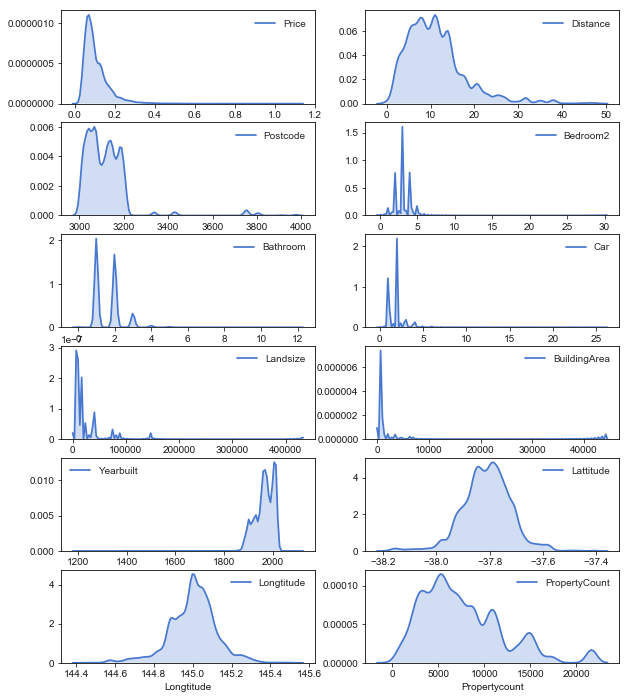

In [4]:
f, axes = plt.subplots(6, 2, figsize=(10, 12))
sns.set(style="white", palette="muted", color_codes=True)

sns.distplot(df.Price, color='b',hist=False, kde_kws={"shade": True}, 
             ax=axes[0, 0], label="Price")
sns.distplot(df.Distance, color='b',hist=False, kde_kws={"shade": True}, 
             ax=axes[0, 1], label="Distance")
sns.distplot(df.Postcode, color='b',hist=False, kde_kws={"shade": True}, 
             ax=axes[1, 0], label="Postcode")
sns.distplot(df.Bedroom2, color='b',hist=False, kde_kws={"shade": True}, 
             ax=axes[1, 1], label="Bedroom2")
sns.distplot(df.Bathroom, color='b',hist=False, kde_kws={"shade": True}, 
             ax=axes[2, 0], label="Bathroom")
sns.distplot(df.Car, color='b',hist=False, kde_kws={"shade": True}, 
             ax=axes[2, 1], label="Car")
sns.distplot(df.Landsize, color='b',hist=False, kde_kws={"shade": True}, 
             ax=axes[3, 0], label="Landsize")
sns.distplot(df.BuildingArea, color='b',hist=False, kde_kws={"shade": True}, 
             ax=axes[3, 1], label="BuildingArea")
sns.distplot(df.YearBuilt, color='b',hist=False, kde_kws={"shade": True}, 
             ax=axes[4, 0], label="Yearbuilt")
# sns.distplot(df.CouncilArea, color='b',hist=False, kde_kws={"shade": True})
sns.distplot(df.Lattitude, color='b',hist=False, kde_kws={"shade": True}, 
             ax=axes[4, 1], label="Lattitude")
sns.distplot(df.Longtitude, color='b',hist=False, kde_kws={"shade": True}, 
             ax=axes[5, 0], label="Longtitude")
# sns.distplot(df.Regionname, color='b',hist=False, kde_kws={"shade": True})
sns.distplot(df.Propertycount, color='b',hist=False, kde_kws={"shade": True}, 
             ax=axes[5, 1], label="PropertyCount")
plt.show()

In [5]:
row,col = df.shape
# the number of missing cell from each column:
# nas = Not Available Series
nas = row-df.describe(include='all').T['count']
nas = nas[nas>0]
# ps = Percentage over total Series
ps = nas/row*100
# ss = Solution Series
ss = {'Price':"Replace by mean", 'Distance':''}
# mode:
ms = df.mode().iloc[0]
# nadf = Not Available DataFrame
nadf = pd.DataFrame(data={'Na Count': nas, 'Na Percentage':ps, 'mode':ms})
# reorder it by column order
nadf = nadf.loc[nas.index]
# Describe NA DataFrame: describe columns with NaN values
dnadf = df.describe().T.reindex(nadf.index)
# add columns from dnadf to nadf
nadf = pd.concat([nadf, dnadf.iloc[:,1:]], axis=1)
nadf

,Na Count,Na Percentage,mode,mean,std,min,25%,50%,75%,max
Price,7610,21.8321,600000,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,1,0.00286886,11.2,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,1,0.00286886,3073,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,8217,23.5735,3,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,8226,23.5993,1,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,8728,25.0394,2,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,11810,33.8813,0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,21115,60.5761,120,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,19306,55.3863,1970,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03
CouncilArea,3,0.00860659,Boroondara City Council,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# //////////_Your code_//////////

__purpose__: clean data with explaination

In [7]:
# Uncomment the line below and run to save your "df" result
# df.to_csv('Melbourne_housing_FULL-cleaned.csv', index=False)